In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from tensorflow.keras.utils import to_categorical
%matplotlib inline


In [7]:
### edTest(test_data) ###

# Load the iris data from sklearn datasets
iris_data = load_iris()

# Set the predictors from the Iris dataset to X
X = iris_data.data

# Set the response from the Iris dataset to X
y = iris_data.target

# Print the shape of the predictor data
print(X.shape)

# Print the shape of the response data
print(y.shape)


(150, 4)
(150,)


In [15]:
y[:5]

array([0, 0, 0, 0, 0])

In [11]:
#from os import O_NOINHERIT
### edTest(test_categorical) ###

# Encode the response labels

Y = to_categorical(y, num_classes=3)
# Take a look at the shape of the one-hot encoded response
print(f'Y shape: {Y.shape}')


Y shape: (150, 3)


In [18]:
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [21]:
# Load and inspect the pre-trained weights and biases
weights = np.load('weights.npy', allow_pickle=True)

# Weights for hidden (1st) layer
w1 = weights[0] 

# Biases for hidden (1st) layer
b1 = weights[1]

# Weights for output (2nd) layer
w2 = weights[2]

# Biases for output (2nd) layer
b2 = weights[3] 


In [22]:
# Compare their shapes to that in the NN diagram.
for arr, name in zip([w1,b1,w2,b2], ['w1','b1','w2','b2']):
    print(f'{name} - shape: {arr.shape}')


w1 - shape: (4, 3)
b1 - shape: (3,)
w2 - shape: (3, 3)
b2 - shape: (3,)


For the first affine transformation we need to multiply the augmented input by the first weight matrix (i.e., layer).

$$
\begin{bmatrix}
1 & X_{11} & X_{12} & X_{13} & X_{14}\\
1 & X_{21} & X_{22} & X_{23} & X_{24}\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & X_{n1} & X_{n2} & X_{n3} & X_{n4}\\
\end{bmatrix} \begin{bmatrix}
b_{1}^1 & b_{2}^1 & b_{3}^1\\
W_{11}^1 & W_{12}^1 & W_{13}^1\\
W_{21}^1 & W_{22}^1 & W_{23}^1\\
W_{31}^1 & W_{32}^1 & W_{33}^1\\
W_{41}^1 & W_{42}^1 & W_{43}^1\\
\end{bmatrix} =
\begin{bmatrix}
z_{11}^1 & z_{12}^1 & z_{13}^1\\
z_{21}^1 & z_{22}^1 & z_{23}^1\\
\vdots & \vdots & \vdots \\
z_{n1}^1 & z_{n2}^1 & z_{n3}^1\\
\end{bmatrix}
= \textbf{Z}^1
$$ 
<span style='color:gray'>About the notation: superscript refers to the layer and subscript refers to the index in the particular matrix. So $W_{23}^1$ is the weight in the 1st layer connecting the 2nd input to 3rd hidden node. Compare this matrix representation to the slide image. Also note the bias terms and ones that have been added to 'augment' certain matrices. You could consider $b_1^1$ to be $W_{01}^1$.</span><div></div>
<span style='color:blue'>1. Augment X with a column of ones to create `X_aug`</span><div></div><span style='color:blue'>2. Create the first layer weight matrix `W1` by vertically stacking the bias vector `b1`on top of `w1` (consult `add_ones_col` for ideas. Don't forget your `Tab` and `Shift+Tab` tricks!)</span><div></div><span style='color:blue'>3. Do the matrix multiplication to find `Z1`</span>



In [23]:
def add_ones_col(X):

    '''Augment matrix with a column of ones'''
    X_aug = np.hstack((np.ones((X.shape[0],1)), X))
    
    return X_aug
    

In [24]:
### edTest(test_Z1) ###

# Add a column of ones
X_aug = add_ones_col(X)

# Stack the biases to the weight matrix
W1 = np.vstack((b1, w1))

# Compute Z1 based on the equation above
Z1 = X_aug @ W1

Next, we use our non-linearity
$$
\textit{a}_{\text{relu}}(\textbf{Z}^1)=
\begin{bmatrix}
h_{11} & h_{12} & h_{13}\\
h_{21} & h_{22} & h_{23}\\
\vdots & \vdots & \vdots \\
h_{n1} & h_{n2} & h_{n3}\\
\end{bmatrix}= \textbf{H}
$$



<span style='color:blue'>1. Define the ReLU activation</span><div></div>
<span style='color:blue'>2. use `plot_activation_func` to confirm implementation</span><div></div>
<span style='color:blue'>3. Use relu on `Z1` to create `H`</span>

In [25]:
def relu(z):
    # Recall the Relu activation function from NN 1 lecture
    
    # Your code here
    h = np.maximum(0,z)
    
    return h
    

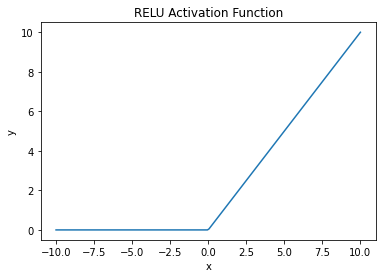

In [26]:
# Helper code to plot the activation function
def plot_activation_func(f, name):
    lin_x = np.linspace(-10,10,200)
    h = f(lin_x)
    plt.plot(lin_x, h)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{name} Activation Function')

plot_activation_func(relu, name='RELU')


In [27]:
### edTest(test_relu) ###

# Activate Z1 to get H
H = relu(Z1)


The next step is very similar to the first and so we've filled it in for you.

$$
\begin{bmatrix}
1 & h_{11} & h_{12} & h_{13}\\
1 & h_{21} & h_{22} & h_{23}\\
\vdots & \vdots & \vdots & \vdots \\
1 & h_{n1} & h_{n2} & h_{n3}\\
\end{bmatrix}
\begin{bmatrix}
b_{1}^2 & b_{2}^2 & b_{3}^2\\
W_{11}^2 & W_{12}^2 & W_{13}^2\\
W_{21}^2 & W_{22}^2 & W_{23}^2\\
W_{31}^2 & W_{32}^2 & W_{33}^2\\
\end{bmatrix}=
\begin{bmatrix}
z_{11}^2 & z_{12}^2 & z_{13}^2\\
z_{21}^2 & z_{22}^2 & z_{23}^2\\
\vdots & \vdots & \vdots \\
z_{n1}^2 & z_{n2}^2 & z_{n3}^2\\
\end{bmatrix} = \textbf{Z}^2
$$


<span style='color:blue'>1. Augment `H` with ones to create `H_aug`</span><div></div>
<span style='color:blue'>2. Combine `w2` and `b2` to create the output weight matric `W2`</span><div></div>
<span style='color:blue'>3. Perform the matrix multiplication to produce `Z2`</span><div></div>

In [28]:
### edTest(test_Z2) ###

# Add a column of ones to H using the function defined
H_aug = add_ones_col(H)

# Add biases to weight matrix by stacking
W2 = np.vstack((b2, w2))

# Compute Z2 based on the equation above
Z2 = H_aug @ W2


Finally we use the softmax activation on `Z2`. Now for each observation we have an output vector of length 3 which can be interpreted as a probability (they sum to 1).
$$
\textit{a}_{\text{softmax}}(\textbf{Z}^2)=
\begin{bmatrix}
\hat{y}_{11} & \hat{y}_{12} & \hat{y}_{13}\\
\hat{y}_{21} & \hat{y}_{22} & \hat{y}_{23}\\
\vdots & \vdots & \vdots \\
\hat{y}_{n1} & \hat{y}_{n2} & \hat{y}_{n3}\\
\end{bmatrix}
= \hat{\textbf{Y}}
$$

<span style='color:blue'>1. Define softmax</span><div></div>
<span style='color:blue'>2. Use `softmax` on `Z2` to create `Y_hat`</span><div></div>

In [29]:
def softmax(z):

    '''
    Input: z - 2D numpy array of logits 
           rows are observations, classes are columns 
    Returns: y_hat - 2D numpy array of probabilities
             rows are observations, classes are columns 
    '''
    exp_z = np.exp(z)
    sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)

    # Hint: we are summing across the columns
    # Ensure you maintain the same dimension as the input
    y_hat = exp_z / sum_exp_z
    
    return y_hat


In [30]:
### edTest(test_softmax) ###

# Call the defined softmax function to get Y_hat
Y_hat = softmax(Z2)


In [33]:
### edTest(test_acc) ###

# From the softmax output, get the predicted y
y_hat = np.argmax(Y_hat, axis=1)

# Compute the accuracy of your prediction
acc = np.mean(y == y_hat)
print(f'accuracy: {acc:.2%}')


accuracy: 96.67%
